In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install catboost

In [ ]:
!pip install xgboost

In [ ]:
df = pd.read_csv("/content/Dataset_Abusive_Tweets.csv")

In [ ]:
df.head()

,Unnamed: 0,Score,Tweets
0,0,0,haa jaise tum bhi abhi
1,1,2,banti hai empowered woman feminism pe gyan pel...
2,2,2,rt ab usko chhod mjse bat kr tera baap aa gya ...
3,3,2,punjab in madarchodon ko khila raha hai nokria...
4,4,2,rt agar koi bole ki ja ke chill maar to madarc...


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.isnull().sum()

Score      0
Tweets    97
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Score,Tweets
0,0,haa jaise tum bhi abhi
1,2,banti hai empowered woman feminism pe gyan pel...
2,2,rt ab usko chhod mjse bat kr tera baap aa gya ...
3,2,punjab in madarchodon ko khila raha hai nokria...
4,2,rt agar koi bole ki ja ke chill maar to madarc...
...,...,...
3184,1,ye dekha tera islamic kashmiri jihaadi suar bhai
3185,1,all love jihaadi should ne killed aise hi
3186,1,ye dekh madarjaat rand ki aullad tera islamic
3187,1,waise jihaadi kutte ki double maut aane wali hai


## VECTORIZATION

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweets'])

In [ ]:
X.get_shape()

(3092, 7644)

In [ ]:
df.shape

(3092, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Score'], test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2473, 7644)
(619, 7644)


## TRAINING AND TESTING OF MODELS

### 1. RANDOM FOREST

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred = rf.predict(X_test)

In [ ]:
pred

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,

In [ ]:
y_test

916     2
1556    0
62      2
885     2
1862    2
       ..
1185    2
44      2
2782    0
1281    2
1447    1
Name: Score, Length: 619, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,f1_score, plot_confusion_matrix

In [ ]:
accuracy_score(y_test, pred)

0.8255250403877221

In [ ]:
confusion_matrix(y_test,pred)

array([[174,   5,  30],
       [ 17,  18,  16],
       [ 39,   1, 319]])

In [ ]:
precision_score(y_test,pred,average="weighted")

0.824102112862395

In [ ]:
recall_score(y_test,pred,average="weighted")

0.8255250403877221

In [ ]:
f1_score(y_test,pred,average="weighted")

0.8182760762141869

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


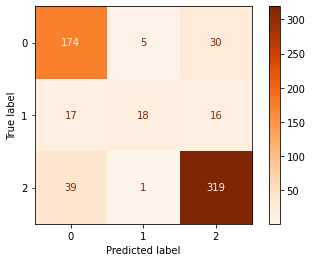

In [ ]:
from matplotlib import pyplot as plt
plot_confusion_matrix(rf, X_test, y_test,cmap="Oranges") 
plt.savefig("RandomForest.png")
plt.show()

### 2. LOGISTIC REGRESSION

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

pred = lg.predict(X_test)

accuracy_score(y_test, pred)

0.8352180936995154

In [ ]:
confusion_matrix(y_test,pred)

array([[164,   4,  41],
       [ 16,  15,  20],
       [ 21,   0, 338]])

In [ ]:
precision_score(y_test,pred,average="weighted")

0.8318349100151338

In [ ]:
recall_score(y_test,pred,average="weighted")

0.8352180936995154

In [ ]:
f1_score(y_test,pred,average="weighted")

0.8226506159089568

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


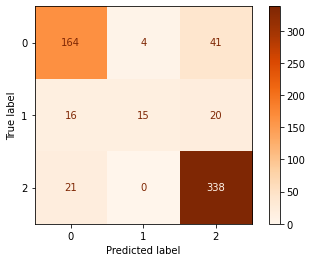

In [ ]:
from matplotlib import pyplot as plt
plot_confusion_matrix(lg, X_test, y_test,cmap="Oranges") 
plt.savefig("LogisticRegression.png")
plt.show()

### 3. SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm

In [ ]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.8303715670436187

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


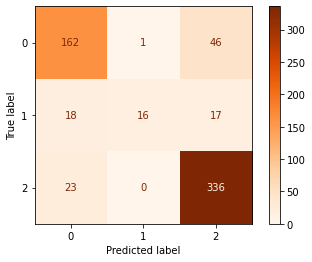

In [ ]:
plot_confusion_matrix(clf, X_test, y_test,cmap="Oranges") 
plt.savefig("SupportVectorMachine.png")
plt.show()

In [ ]:
precision_score(y_test,pred, average="weighted")

0.8353860530106392

In [ ]:
recall_score(y_test,pred,average="weighted")

0.8303715670436187

In [ ]:
f1_score(y_test,pred,average="weighted")

0.8184626051511629

### 4. NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

### 4.1 GAUSSIAN NAIVE BAYES

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
pred = gnb.predict(X_test.toarray())

accuracy_score(y_test, pred)

0.6607431340872375

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


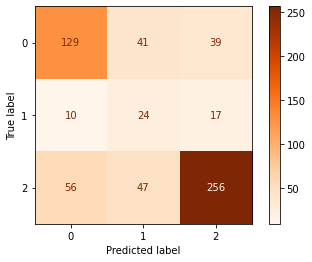

In [ ]:
plot_confusion_matrix(gnb,X_test.toarray(), y_test,cmap="Oranges") 
plt.savefig("GaussianNB.png")
plt.show()

In [ ]:
precision_score(y_test,pred, average="weighted")

0.7168888731085822

In [ ]:
recall_score(y_test,pred,average="weighted")

0.6607431340872375

In [ ]:
f1_score(y_test,pred,average="weighted")

0.682423501682157

### 4.2 MULTINOMIAL NAIVE BAYES

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)

accuracy_score(y_test, pred)

0.7641357027463651

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


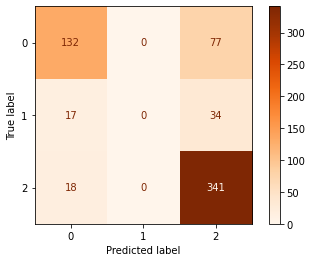

In [ ]:
plot_confusion_matrix(mnb,X_test, y_test,cmap="Oranges") 
plt.savefig("MultinomialNB.png")
plt.show()

In [ ]:
precision_score(y_test,pred, average="weighted")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7044201944517616

In [ ]:
recall_score(y_test,pred,average="weighted")

0.7641357027463651

In [ ]:
f1_score(y_test,pred,average="weighted")

0.7247836914681066

### 4.3 COMPLEMENT NAIVE BAYES

In [ ]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)
pred = cnb.predict(X_test)

accuracy_score(y_test, pred)

0.7738287560581584

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


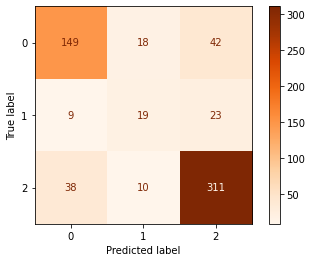

In [ ]:
plot_confusion_matrix(cnb,X_test, y_test,cmap="Oranges") 
plt.savefig("ComplementNB.png")
plt.show()

In [ ]:
precision_score(y_test,pred,average="weighted")

0.7696906367125271

In [ ]:
recall_score(y_test,pred,average="weighted")

0.7738287560581584

In [ ]:
f1_score(y_test,pred,average="weighted")

0.7711874458393422

### 4.4 BERNOULLI NAIVE BAYES

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred = bnb.predict(X_test)

accuracy_score(y_test, pred)

0.7479806138933764

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


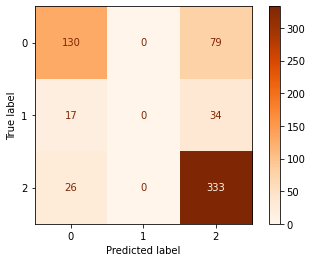

In [ ]:
plot_confusion_matrix(bnb,X_test, y_test,cmap="Oranges") 
plt.savefig("BernoulliNB.png")
plt.show()

In [ ]:
precision_score(y_test,pred,average="weighted")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6867441421942622

In [ ]:
recall_score(y_test,pred,average="weighted")

0.7479806138933764

In [ ]:
f1_score(y_test,pred,average="weighted")

0.709632453997976

### 5. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc=AdaBoostClassifier()

In [ ]:
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

accuracy_score(y_test, pred)

0.7172859450726979

In [ ]:
precision_score(y_test,pred,average="weighted")

0.7067929401516971

In [ ]:
recall_score(y_test,pred,average="weighted")

0.7172859450726979

In [ ]:
f1_score(y_test,pred,average="weighted")

0.6928448910837537

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


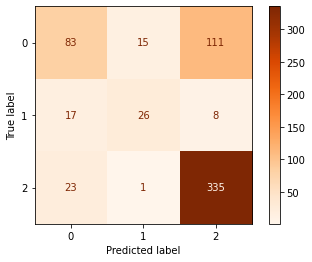

In [ ]:
plot_confusion_matrix(abc,X_test, y_test,cmap="Oranges") 
plt.savefig("AdaBoost.png")
plt.show()

### 6. CatBoost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
clf = CatBoostClassifier(
    iterations=600,
    learning_rate=1.0,
    verbose = 10
)

In [ ]:
clf.fit(X_train, y_train)

0:	learn: 0.8336955	total: 238ms	remaining: 2m 22s
10:	learn: 0.5539726	total: 1.15s	remaining: 1m 1s
20:	learn: 0.4756216	total: 2.03s	remaining: 56s
30:	learn: 0.4310880	total: 2.91s	remaining: 53.4s
40:	learn: 0.3986711	total: 3.78s	remaining: 51.5s
50:	learn: 0.3780000	total: 4.64s	remaining: 49.9s
60:	learn: 0.3646667	total: 5.5s	remaining: 48.6s
70:	learn: 0.3471580	total: 6.39s	remaining: 47.6s
80:	learn: 0.3335618	total: 7.25s	remaining: 46.5s
90:	learn: 0.3185050	total: 8.11s	remaining: 45.4s
100:	learn: 0.2993372	total: 8.98s	remaining: 44.4s
110:	learn: 0.2804964	total: 9.85s	remaining: 43.4s
120:	learn: 0.2713584	total: 10.7s	remaining: 42.4s
130:	learn: 0.2628542	total: 11.6s	remaining: 41.4s
140:	learn: 0.2552148	total: 12.4s	remaining: 40.5s
150:	learn: 0.2471661	total: 13.3s	remaining: 39.5s
160:	learn: 0.2407698	total: 14.1s	remaining: 38.6s
170:	learn: 0.2345349	total: 15s	remaining: 37.7s
180:	learn: 0.2273313	total: 15.9s	remaining: 36.8s
190:	learn: 0.2206171	total

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8465266558966075

In [ ]:
precision_score(y_test,y_pred,average="weighted")

0.8451434359899077

In [ ]:
recall_score(y_test,y_pred,average="weighted")

0.8465266558966075

In [ ]:
f1_score(y_test,y_pred,average="weighted")

0.8446003890623469

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


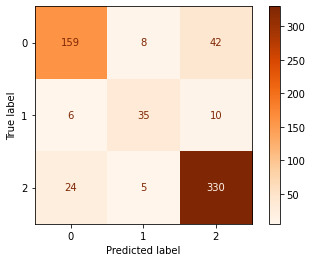

In [ ]:
plot_confusion_matrix(clf,X_test, y_test,cmap="Oranges") 
plt.savefig("CatBoost.png")
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(learning_rate=0.3)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, objective='multi:softprob')

In [ ]:
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.8788368336025848

In [ ]:
precision_score(y_test,xgb_pred,average="weighted")

0.8794532518280499

In [ ]:
recall_score(y_test,xgb_pred,average="weighted")

0.8788368336025848

In [ ]:
f1_score(y_test,xgb_pred,average="weighted")

0.8784199548310667

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


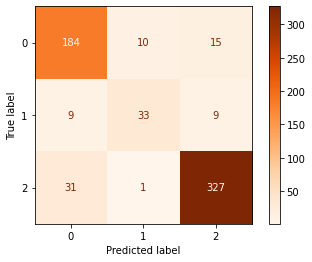

In [ ]:
plot_confusion_matrix(xgb,X_test, y_test,cmap="Oranges") 
plt.savefig("XGBoost.png")
plt.show()